In [2]:
from sklearn.decomposition import PCA
import numpy as np
from sklearn import datasets
from matplotlib import style
style.use('ggplot')

- Iris 데이터

In [3]:
iris = datasets.load_iris()

In [4]:
y = iris.target
x = iris.data

In [5]:
x[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [6]:
x.shape

(150, 4)

# PCA 계산
- 공분산 행렬
- eigen value, eigen vector

## 1. 공분산 행렬

### - x를 centering 한 후, 곱해준다.

In [14]:
cov = np.dot((x - x.mean(axis=0)).T, (x - x.mean(axis=0)))

In [15]:
## 4 x 4 행렬

cov

array([[102.16833333,  -5.851     , 189.77866667,  77.01866667],
       [ -5.851     ,  28.0126    , -47.9352    , -17.5792    ],
       [189.77866667, -47.9352    , 463.86373333, 193.16173333],
       [ 77.01866667, -17.5792    , 193.16173333,  86.77973333]])

## 2. eigen value, eigen vector를 구한다.

In [16]:
ev, eig = np.linalg.eig(cov)

In [26]:
ev

array([629.50127448,  36.09429217,  11.70006231,   3.52877104])

In [27]:
eig.T

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [-0.65653988, -0.72971237,  0.1757674 ,  0.07470647],
       [-0.58099728,  0.59641809,  0.07252408,  0.54906091],
       [ 0.31725455, -0.32409435, -0.47971899,  0.75112056]])

## 3. 분산이 큰 ( eigen value가 큰 ) eigen vector만 선택한다.
- 2개를 선택해보자

In [28]:
eig_pca = eig.T[:2]

## 4. 위에서 선택한 eigen vector로 (centerting된 ) 원래 데이터를 투영시킨다.

In [126]:
(x - x.mean(axis=0)).dot(eig_pca[:2].T)[:10]

array([[-2.68420713, -0.32660731],
       [-2.71539062,  0.16955685],
       [-2.88981954,  0.13734561],
       [-2.7464372 ,  0.31112432],
       [-2.72859298, -0.33392456],
       [-2.27989736, -0.74778271],
       [-2.82089068,  0.08210451],
       [-2.62648199, -0.17040535],
       [-2.88795857,  0.57079803],
       [-2.67384469,  0.1066917 ]])

## 5. 3에서 선택한 개수만큼의 차원으로 축소된 데이터를 갖게된다.

In [85]:
(x - x.mean(axis=0)).dot(eig[:2].T)[:10]

array([[ 0.49194893, -1.34738775],
       [ 0.74790093, -0.96607778],
       [ 0.60237475, -1.15520829],
       [ 0.51567031, -0.95472654],
       [ 0.39013597, -1.41213209],
       [ 0.2269616 , -1.54984681],
       [ 0.40853353, -1.2656915 ],
       [ 0.46334422, -1.20654781],
       [ 0.63276008, -0.8519721 ],
       [ 0.59242176, -0.94699778]])

In [94]:
eig = eig[:2]

In [105]:
eig

array([[ 0.36158968, -0.65653988, -0.58099728,  0.31725455],
       [-0.08226889, -0.72971237,  0.59641809, -0.32409435]])

# sklearn PCA 모듈과 비교

In [79]:
pca = PCA(n_components=2).fit(x)

- 주성분 비교

In [80]:
## 주성분 

pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

In [120]:
eig_pca

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [-0.65653988, -0.72971237,  0.1757674 ,  0.07470647]])

- 차원 축소 결과

In [27]:
pca.transform(x)[:10]

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ]])

In [125]:
(x - x.mean(axis=0)).dot(eig_pca.T)[:10]

array([[-2.68420713, -0.32660731],
       [-2.71539062,  0.16955685],
       [-2.88981954,  0.13734561],
       [-2.7464372 ,  0.31112432],
       [-2.72859298, -0.33392456],
       [-2.27989736, -0.74778271],
       [-2.82089068,  0.08210451],
       [-2.62648199, -0.17040535],
       [-2.88795857,  0.57079803],
       [-2.67384469,  0.1066917 ]])

# 시각화

In [127]:
import matplotlib.pyplot as plt

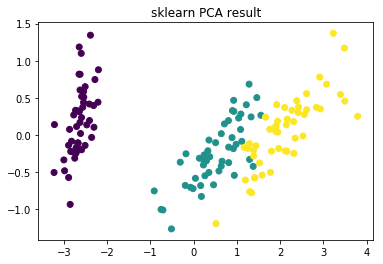

In [132]:
plt.title('sklearn PCA result')
plt.scatter(pca.transform(x)[:, 0], pca.transform(x)[:, 1], c=y)
plt.show()

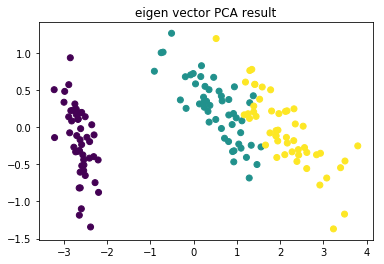

In [135]:
eig_result = (x - x.mean(axis=0)).dot(eig_pca.T)
plt.title('eigen vector PCA result')
plt.scatter(eig_result[:, 0], eig_result[:, 1], c=y)
plt.show()